In [1]:
import math
import time
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style
import paste as pst
import kaleido

In [2]:
data_dir = './sample_data/'

# Assume that the coordinates of slices are named slice_name + "_coor.csv"
def load_slices(data_dir, slice_names=["slice1", "slice2", "slice3", "slice4"]):
    slices = []  
    for slice_name in slice_names:
        slice_i = sc.read_csv(data_dir + slice_name + ".csv")
        slice_i_coor = np.genfromtxt(data_dir + slice_name + "_coor.csv", delimiter = ',')
        slice_i.obsm['spatial'] = slice_i_coor
        # Preprocess slices
        sc.pp.filter_genes(slice_i, min_counts = 15)
        sc.pp.filter_cells(slice_i, min_counts = 100)
        slices.append(slice_i)
    return slices

slices = load_slices(data_dir)
slice1, slice2, slice3, slice4 = slices

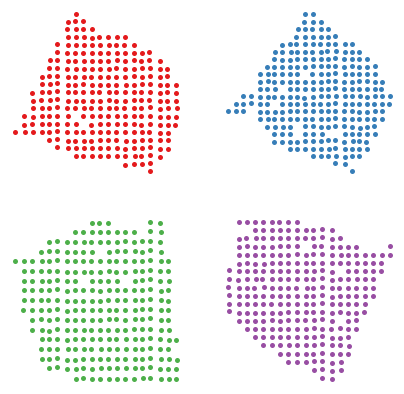

In [3]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
pst.plot_slice(slice1,slice_colors[0],ax=axs[0,0])
pst.plot_slice(slice2,slice_colors[1],ax=axs[0,1])
pst.plot_slice(slice3,slice_colors[2],ax=axs[1,0])
pst.plot_slice(slice4,slice_colors[3],ax=axs[1,1])
#plt.savefig("paste1.svg", format='svg', dpi=200, bbox_inches="tight")

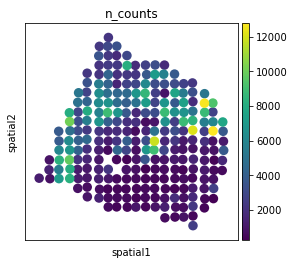

In [4]:
sc.pl.spatial(slice1, color = "n_counts", spot_size = 1)

In [5]:
start = time.time()

pi12 = pst.pairwise_align(slice1, slice2)
pi23 = pst.pairwise_align(slice2, slice3)
pi34 = pst.pairwise_align(slice3, slice4)

print('Runtime: ' + str(time.time() - start))

Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Runtime: 2.2944633960723877


In [6]:
pis = [pi12, pi23, pi34]
slices = [slice1, slice2, slice3, slice4]

new_slices = pst.stack_slices_pairwise(slices, pis)

In [7]:
slice_colors = ['#e41a1c','#377eb8',"pink",'yellow']

In [8]:
new_slices

[AnnData object with n_obs × n_vars = 254 × 7998
     obs: 'n_counts'
     var: 'n_counts'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 250 × 7713
     obs: 'n_counts'
     var: 'n_counts'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 263 × 7453
     obs: 'n_counts'
     var: 'n_counts'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 262 × 7571
     obs: 'n_counts'
     var: 'n_counts'
     obsm: 'spatial']

In [9]:
slice_colors

['#e41a1c', '#377eb8', 'pink', 'yellow']

(-12.016409671994602,
 10.141471674620085,
 10.135182159528792,
 -11.903557633569005)

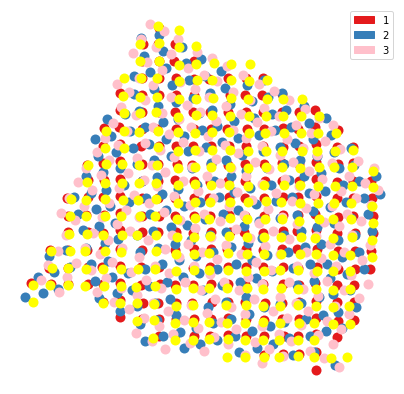

In [10]:
####3D代码
plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3')])
plt.gca().invert_yaxis()
plt.axis('off')
#plt.savefig("paste2.svg", format='svg', dpi=200, bbox_inches="tight")

In [11]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [12]:
z_scale = 2

values = []
for i,L in enumerate(new_slices):
    for x,y in L.obsm['spatial']:
        values.append([x, y, i*z_scale, str(i)])
df = pd.DataFrame(values, columns=['x','y','z','slice'])
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='slice',color_discrete_sequence=slice_colors)
fig.update_layout(scene_aspectmode='data')
fig.write_image("model_3d.svg")
#fig.show()
#plt.savefig("model_3d.svg", format='svg', dpi=200, bbox_inches="tight")